In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

from branchcut.exampleCreator import createExample, createUnwrappedBaseline, TrueBranchCuts
from branchcut.unwrap import *
from branchcut.setup import find_residues, create_mask
from branchcut.branchCut import branch_cut

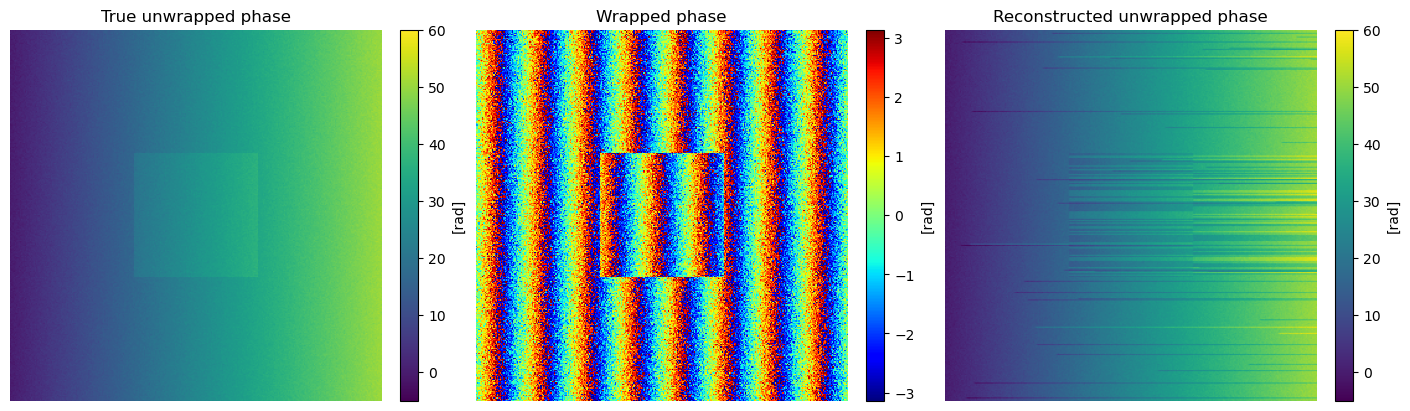

In [30]:
# make example
SIZE = (300,300)
MINPHASE = 0
MAXPHASE = 16*np.pi
phase_baseline = createUnwrappedBaseline(SIZE, (MINPHASE,MAXPHASE), format='horizontal')

square1 = np.zeros(SIZE)
square1[100:200,100:200] = 1*np.pi

square2 = np.ones(SIZE)
square2[120:180,120:180] = 1

phase_unwrapped, phase_wrapped = createExample(phase_baseline, add_image=square1, mult_image=square2, noise_sigma=0.2*np.pi, add_first=False)

fig, ax = plt.subplots(1,3,figsize=(14,4),layout='constrained')
im = ax[0].imshow(phase_unwrapped,vmin=-5,vmax=60)
ax[0].axis('off')
fig.colorbar(im, label='[rad]')
ax[0].set_title('True unwrapped phase')

im = ax[1].imshow(phase_wrapped,cmap='jet',interpolation='none')
ax[1].axis('off')
fig.colorbar(im, label='[rad]')
ax[1].set_title('Wrapped phase')

im = ax[2].imshow(np.unwrap(phase_wrapped),vmin=-5,vmax=60)
ax[2].axis('off')
fig.colorbar(im, label='[rad]')
ax[2].set_title('Reconstructed unwrapped phase')

plt.savefig('wrongUnwrap.pdf')

In [11]:
residues = find_residues(phase_wrapped)
BranchCuts = branch_cut(residues)
phase_unwrapped_BC = unwrap(phase_wrapped,seed=(0,0), branchCuts=BranchCuts, mode='bfs', unwrapBranchPixels=True)
phase_unwrapped_BC_2 = unwrap(phase_wrapped,seed=(0,0), branchCuts=BranchCuts, mode='dfs',unwrapBranchPixels=True)
TBC = TrueBranchCuts(phase_unwrapped)
true_unwrap = unwrap(phase_wrapped, seed=(0,0), branchCuts=TBC)

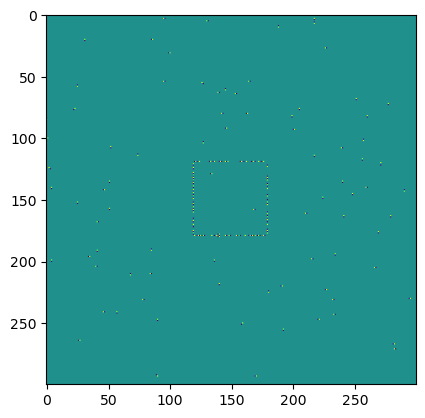

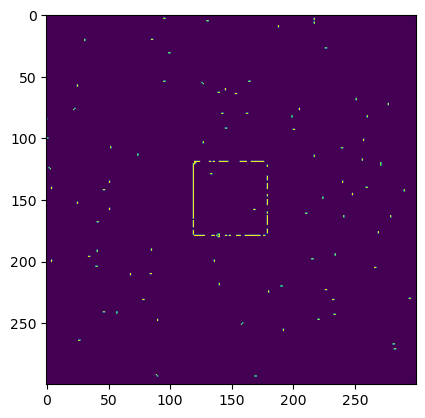

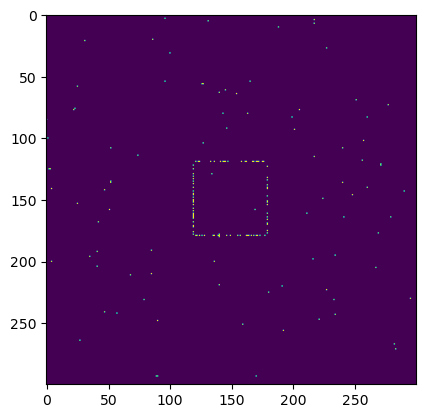

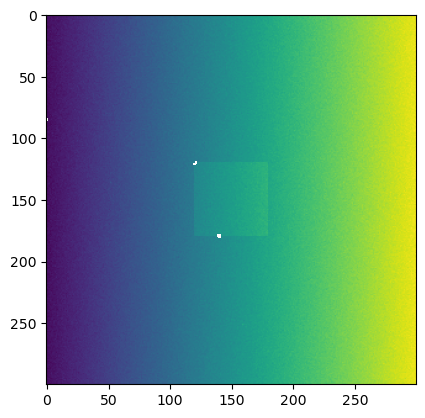

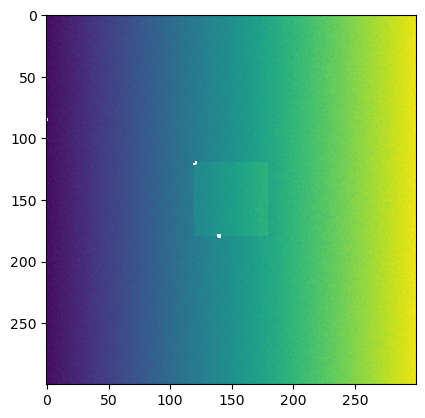

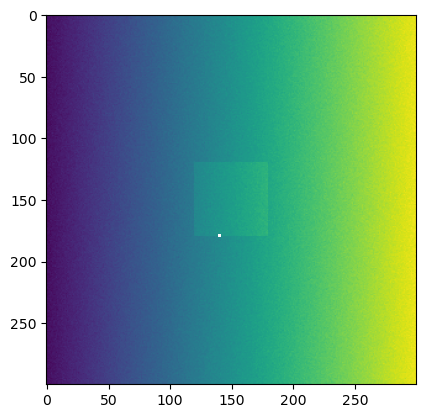

In [12]:

plt.figure()
plt.imshow(residues)

plt.figure()
plt.imshow(BranchCuts)

plt.figure()
plt.imshow(TBC)

plt.figure()
plt.imshow(phase_unwrapped_BC)

plt.figure()
plt.imshow(phase_unwrapped_BC_2)

plt.figure()
plt.imshow(true_unwrap)